# Case iFood - Data Analyst / Data Scientist

Uma empresa bem estabelecida que atua no setor de varejo de alimentos. Atualmente, eles têm milhares de clientes registrados e atendem quase um milhão de consumidores por ano. Eles vendem produtos de 5 grandes categorias: vinhos, carnes, frutas exóticas, peixes especialmente preparados e produtos doces. Estes podem ser divididos ainda mais em produtos *gold* e regulares. Os clientes podem encomendar e adquirir produtos por meio de 3 canais de vendas: lojas físicas, catálogos e site da empresa.

O objetivo da empresa é melhorar o desempenho das atividades de marketing, com foco especial em campanhas de marketing, gastando seu orçamento anual com mais sabedoria.

A análise exploratória de dados (EDA) é uma etapa fundamental da Ciência de Dados que permite entender profundamente os dados antes da criação de modelos. Para uma equipe de marketing, a EDA é essencial porque revela padrões de comportamento do consumidor, identifica segmentos de público, avalia o desempenho de campanhas anteriores e orienta decisões estratégicas com base em dados concretos. Com ela, é possível personalizar ações, otimizar recursos e encontrar oportunidades que aumentem o engajamento e as conversões, tornando o marketing mais eficiente e direcionado.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.funcoes_auxiliares import (
    inspect_outliers,
    remove_outliers,
)

In [2]:
df = pd.read_csv('../dados/ml_project1_data.csv', sep='\t')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

#### Dados Básicos

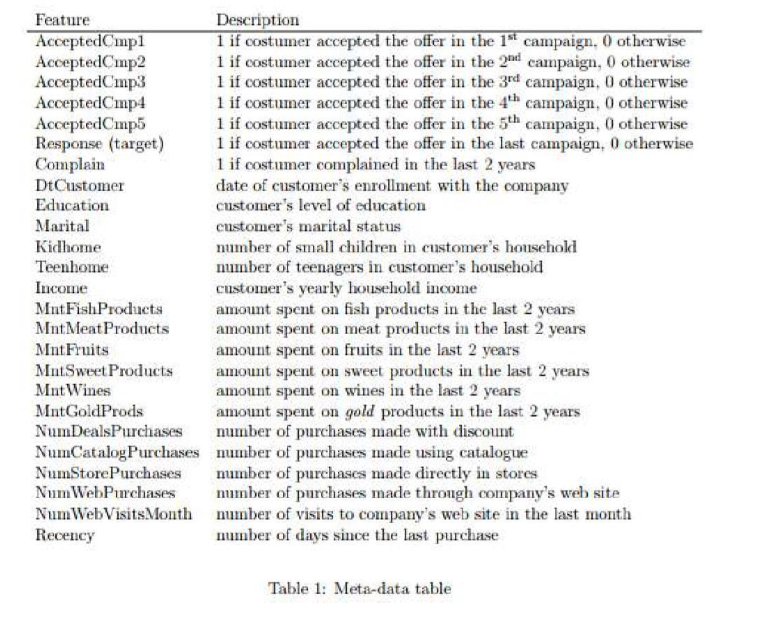

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
with pd.option_context("display.float_format", "{:,.2f}".format, "display.max_columns", None):
    display(df.describe())

ID  Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  \
count  2,240.00    2,240.00   2,216.00 2,240.00  2,240.00 2,240.00  2,240.00   
mean   5,592.16    1,968.81  52,247.25     0.44      0.51    49.11    303.94   
std    3,246.66       11.98  25,173.08     0.54      0.54    28.96    336.60   
min        0.00    1,893.00   1,730.00     0.00      0.00     0.00      0.00   
25%    2,828.25    1,959.00  35,303.00     0.00      0.00    24.00     23.75   
50%    5,458.50    1,970.00  51,381.50     0.00      0.00    49.00    173.50   
75%    8,427.75    1,977.00  68,522.00     1.00      1.00    74.00    504.25   
max   11,191.00    1,996.00 666,666.00     2.00      2.00    99.00  1,493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count   2,240.00         2,240.00         2,240.00          2,240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00         1,725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count      2,240.00           2,240.00         2,240.00             2,240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count           2,240.00           2,240.00      2,240.00      2,240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count      2,240.00      2,240.00      2,240.00  2,240.00       2,240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count   2,240.00  2,240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

In [6]:
df.describe(exclude='number')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [7]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#### Removendo dados únicos, duplicados ou nulos

OBS: Excluindo da base as colunas que apresentam apenas um resultado (Z_CostContact e Z_Revennue).

In [8]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [9]:
# Vendo valores duplicados
df[df.duplicated].sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                 0.0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
dtype: object

In [10]:
# Vendo onde existem valores nulos
df[df.isnull().any(axis=1)]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
10    15-11-2013       11         5  ...                    0   
27    20-02-2013       19         5  ...                    0   
43    05-11-2013       80        81  ...                    3   
48    01-01-2014       96        48  ...                    1   
58    17-06-2013       57        11  ...                    0   
71    14-09-2012       25        25  ...                    0   
90    19-11-2012        4       230  ...                    2   
91    27-05-2014       45         7  ...                    0   
92    23-11-2013       87       445  ...                    4   
128   11-07-2013       23       352  ...                    1   
133   11-08-2013       96       231  ...                    5   
312   03-06-2013       69       861  ...                    5   
319   23-08-2013       67       738  ...                    3   
1379  01-04-2013       39       187  ...                    2   
1382  03-09-2012       87        19  ...                    0   
1383  12-01-2014       49         5  ...                    0   
1386  02-03-2014       17        25  ...                    0   
2059  18-05-2013       52       375  ...                   10   
2061  31-05-2013       82        23  ...                    0   
2078  03-03-2013       82        71  ...                    1   
2079  23-06-2013       83       161  ...                    1   
2081  18-10-2013       95       264  ...                    1   
2084  30-10-2013       75       532  ...                    5   
2228  12-08-2012       53        32  ...                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
10                    2                  7             0             0   
27                    0                  1             0             0   
43                    4                  2             0             0   
48                    4                  6             0     

In [11]:
print(f"Percentual de dados nulos da base: {len(df[df.isnull().any(axis=1)])/len(df):.1%}")

Percentual de dados nulos da base: 1.1%


OBS: Podemos excluir os dados acima porque é um percentual muito baixo da base de dados

In [12]:
df = df.dropna()

In [13]:
print(f"Percentual de dados nulos da base: {len(df[df.isnull().any(axis=1)])/len(df):.1%}")

Percentual de dados nulos da base: 0.0%


#### Feature Engineering - Adicionando Colunas

In [14]:
# Converter 'Dt_Customer' para datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [15]:
df["Dt_Customer"].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [16]:
# Adicionando a coluna 'DaysSinceEnrolled' que calcula o número de dias desde a inscrição do cliente

df["DaysSinceEnrolled"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["DaysSinceEnrolled"] = df["DaysSinceEnrolled"].dt.days

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2012-09-04       58       635  ...                  4                  7   
1  2014-03-08       38        11  ...                  2                  5   
2  2013-08-21       26       426  ...                 10                  4   
3  2014-02-10       26        11  ...                  4                  6   
4  2014-01-19       94       173  ...                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  DaysSinceEnrolled  
0         0         1                663  
1         0         0                113  
2         0         0                312  
3         0         0                139  
4         0         0                161  

[5 rows x 28 columns]

In [17]:
# Adicionando a coluna 'YearsSinceEnrolled' que calcula o número de anos desde a inscrição do cliente

df["YearsSinceEnrolled"] = df["DaysSinceEnrolled"] // 365        # A divisão por duas barras (//) fornece apenas o valor inteoro
df["YearsSinceEnrolled"].value_counts()


YearsSinceEnrolled
0    1144
1    1072
Name: count, dtype: int64

In [18]:
# Transformando a coluna 'Year_Birth' para calcular a idade do cliente

df["Age"] = df["Dt_Customer"].max().year - df["Year_Birth"]    
df["Age"].describe()

# OBS: O critério adotado para calcular a idade do cliente foi o último ano de inscrição do cliente, que é o ano máximo da coluna 'Dt_Customer'.

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [19]:
df['Age'].value_counts().sort_index(ascending=False).head(5)          # Vejamos que temos 3 dados de pessoas acima de 100 anos.

Age
121    1
115    1
114    1
74     1
73     1
Name: count, dtype: int64

In [20]:
# Transformando a idade do cliente em categorias

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18, 30, 45, 60, df['Age'].max()],
    labels=['18-30', '31-45', '46-60', '61+'],
    include_lowest=True                           # Esse comando permite que o valor mínimo do primeiro intervalo seja incluído na primeira categoria
)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  DaysSinceEnrolled  \
0             0             0         0         1                663   
1             0             0         0         0                113   
2             0             0         0         0                312   
3             0             0         0         0                139   
4             0             0         0         0                161   

   YearsSinceEnrolled  Age  AgeGroup  
0                   1   57     46-60  
1                   0   60     46-60  
2                   0   49     46-60  
3                   0   30     18-30  
4                   0   33     31-45  

[5 rows x 31 columns]

In [21]:
df['AgeGroup'].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
18-30    257
Name: count, dtype: int64

In [22]:
df.columns[df.columns.str.startswith('Mnt')]               # Verificando as colunas que começam com 'Mnt' 

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [23]:
# Criando a coluna para o somatório dos produtos totais, e o somatório dos produtos regulares (suposiçaõ de existir os produtos 'regulares' e produtos "Gold")

df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +df['MntFishProducts'] +df['MntSweetProducts'] + df['MntGoldProds']

df['MntRegularProducts'] = df['MntTotal'] - df['MntGoldProds']

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Response  DaysSinceEnrolled  YearsSinceEnrolled  Age  AgeGroup  MntTotal  \
0         1                663                   1   57     46-60      1617   
1         0                113                   0   60     46-60        27   
2         0                312                   0   49     46-60       776   
3         0                139                   0   30     18-30        53   
4         0                161                   0   33     31-45       422   

   MntRegularProducts  
0                1529  
1                  21  
2                 734  
3                  48  
4                 407  

[5 rows x 33 columns]

In [24]:
# Somando as colunas 'Kidhome' e 'Teenhome' para criar a coluna 'Children'

df['Children'] = df['Kidhome'] + df['Teenhome']  

In [25]:
# Criando a coluna 'HasChildren' que indica se o cliente tem filhos

df['HasChildren'] = df['Children'].apply(lambda x: 1 if x>0 else 0)     
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Response  DaysSinceEnrolled  \
0  2012-09-04       58       635  ...         0         1                663   
1  2014-03-08       38        11  ...         0         0                113   
2  2013-08-21       26       426  ...         0         0                312   
3  2014-02-10       26        11  ...         0         0                139   
4  2014-01-19       94       173  ...         0         0                161   

   YearsSinceEnrolled  Age  AgeGroup  MntTotal  MntRegularProducts  Children  \
0                   1   57     46-60      1617                1529         0   
1                   0   60     46-60        27                  21         2   
2                   0   49     46-60       776                 734         0   
3                   0   30     18-30        53                  48         1   
4                   0   33     31-45       422                 407         1   

   HasChildren  
0            0  
1            1  
2            0  
3            1  
4            1  

[5 rows x 35 columns]

In [26]:
df['HasChildren'].value_counts()

HasChildren
1    1583
0     633
Name: count, dtype: int64

In [27]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [28]:
# Simplificando as categorias da coluna 'Marital_Status' para menos categorias (solteiras ou com algum parceiro)

df['Marital_Status'] = df['Marital_Status'].replace({
    'Single': 'Single',
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

df['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

In [29]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [30]:
# Simplificando as categorias da coluna 'Education' para menos categorias 

#df['Education'] = df['Education'].replace({
#    'Basic': 'Basic',
#    '2n Cycle': 'Graduation',
#    'Graduation': 'Graduation',
#    'Master': 'Post-Graduation',
#    'PhD': 'Post-Graduation'
#})

In [31]:
# Criando a coluna para ver quantas campanhas de marketing cada cliente aceitou

df['AcceptedCmpTotal'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

df['AcceptedCmpTotal'].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [32]:
# Criando coluna para identificar quais clientes compraram após alguma das campanhas de marketing

df['HasAcceptedCmp'] = df['AcceptedCmpTotal'].apply(lambda x: 1 if x > 0 else 0)

df['HasAcceptedCmp'].value_counts()

HasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

In [33]:
df.loc[:, df.columns.str.startswith('Num')]

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  
0                     4                  7  
1                     2                  5  
2                    10                  4  
3                     4                  6  
4                     6                  5  
...                 ...                ...  
2235                  4                  5  
2236                  5                  7  
2237                 13                  6  
2238                 10                  3  
2239                  4                  7  

[2216 rows x 5 columns]

In [34]:
# Podemos criar um coluna que o somatório total das compras

df['NumTotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Obs: 'NumDealsPurchases' fica de fora, pois não é uma compra, mas sim um desconto aplicado em compras

df['NumTotalPurchases'].value_counts()

NumTotalPurchases
4     200
6     188
5     179
7     127
3     125
18    102
14     98
16     98
17     88
20     85
21     85
19     85
15     83
11     77
13     75
22     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
29      6
0       6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64

#### Detalhamento de todas as colunas

In [35]:
df.shape

(2216, 38)

In [36]:
df.select_dtypes(include='number').columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'DaysSinceEnrolled', 'YearsSinceEnrolled', 'Age', 'MntTotal',
       'MntRegularProducts', 'Children', 'HasChildren', 'AcceptedCmpTotal',
       'HasAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [37]:
df.select_dtypes(include='number').columns.shape

(34,)

In [38]:
df.select_dtypes(exclude='number').columns

Index(['Education', 'Marital_Status', 'Dt_Customer', 'AgeGroup'], dtype='object')

In [39]:
df.select_dtypes(exclude='number').columns.shape

(4,)

#### Analisando Outliers

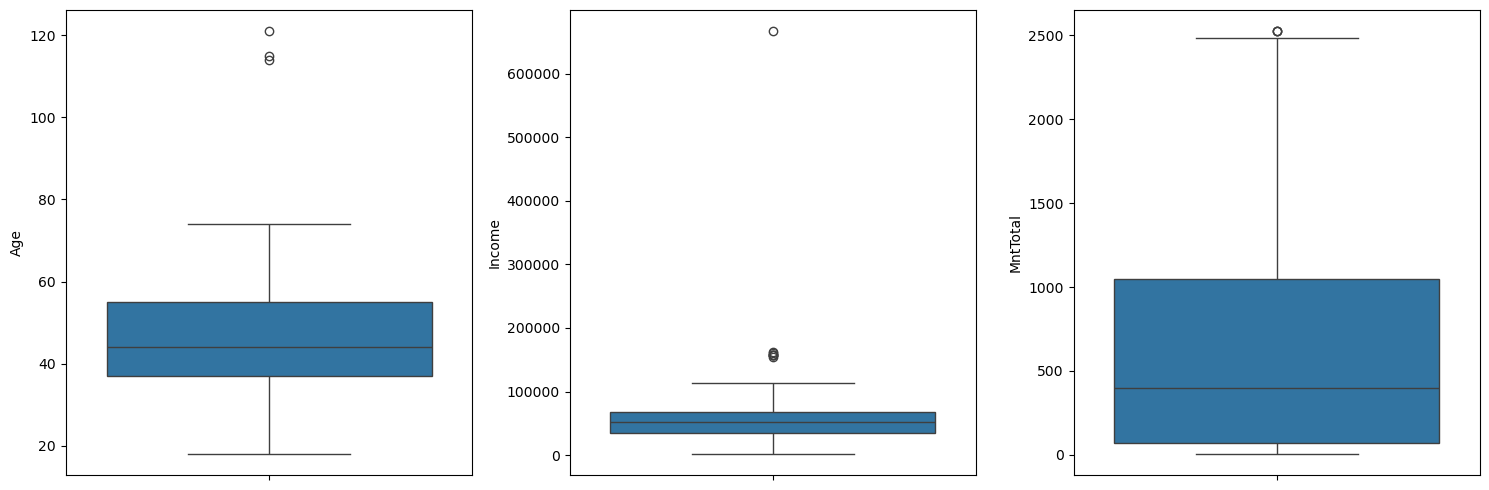

In [40]:
seach_outliers = ['Age', 'Income', 'MntTotal']

fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

for i, column in enumerate(seach_outliers):
    sns.boxplot(data=df, y=column, ax=axs[i])
    
plt.show()

In [41]:
from src.funcoes_auxiliares import inspect_outliers

inspect_outliers(df, 'Age')

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD        Partner  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  AgeGroup  \
192  2013-09-26       99        15  ...                   0  114       61+   
239  2014-05-17       23         8  ...                   0  121       61+   
339  2013-09-26       36       755  ...                   0  115       61+   

     MntTotal  MntRegularProducts  Children  HasChildren  AcceptedCmpTotal  \
192        65                  40         1            1                 0   
239        22                  20         1            1                 0   
339      1853                1629         0            0                 1   

     HasAcceptedCmp  NumTotalPurchases  
192               0                  5  
239               0                  3  
339               1                 14  

[3 rows x 38 columns]

In [42]:
inspect_outliers(df, 'Income')

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Partner  157243.0        0   
617    1503        1976         PhD        Partner  162397.0        1   
655    5555        1975  Graduation         Single  153924.0        0   
687    1501        1982         PhD        Partner  160803.0        0   
1300   5336        1971      Master        Partner  157733.0        1   
1653   4931        1977  Graduation        Partner  157146.0        0   
2132  11181        1949         PhD        Partner  156924.0        0   
2233   9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  \
164          1  2014-03-01       98        20  ...                   0   41   
617          1  2013-06-03       31        85  ...                   1   38   
655          0  2014-02-07       81         1  ...                   0   39   
687          0  2012-08-04       21        55  ...                   1   32   
1300         0  2013-06-04       37        39  ...                   1   43   
1653         0  2013-04-29       13         1  ...                   1   37   
2132         0  2013-08-29       85         2  ...                   0   65   
2233         0  2013-06-02       23         9  ...                   1   37   

      AgeGroup  MntTotal  MntRegularProducts  Children  HasChildren  \
164      31-45      1608                1607         1            1   
617      31-45       107                 105         2            1   
655      31-45         6                   5         0            0   
687      31-45      1717                1713         0            0   
1300     31-45        59                  51         1            1   
1653     31-45      1730                1729         0            0   
2132       61+         8                   7         0            0   
2233     31-45        62                  50         1            1   

      AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
164                  0               0                 22  
617                  0               0                  1  
655                  0               0                  0  
687                  0               0                 29  
1300                 0               0                  2  
1653                 0               0                 28  
2132                 0               0                  0  
2233                 0               0                  7  

[8 rows x 38 columns]

In [43]:
df[df['Income']>200000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  \
2233         0  2013-06-02       23         9  ...                   1   37   

      AgeGroup  MntTotal  MntRegularProducts  Children  HasChildren  \
2233     31-45        62                  50         1            1   

      AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
2233                 0               0                  7  

[1 rows x 38 columns]

In [44]:
inspect_outliers(df, 'MntTotal')

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1179  5735        1991      Master         Single  90638.0        0         0   
1492  1763        1988  Graduation        Partner  87679.0        0         0   
1572  5350        1991      Master         Single  90638.0        0         0   

     Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  AgeGroup  \
1179  2014-02-13       29      1156  ...                   0   23     18-30   
1492  2013-07-27       62      1259  ...                   0   26     18-30   
1572  2014-02-13       29      1156  ...                   0   23     18-30   

      MntTotal  MntRegularProducts  Children  HasChildren  AcceptedCmpTotal  \
1179      2525                2429         0            0                 1   
1492      2524                2491         0            0                 3   
1572      2525                2429         0            0                 1   

      HasAcceptedCmp  NumTotalPurchases  
1179               1                 17  
1492               1                 28  
1572               1                 17  

[3 rows x 38 columns]

#### Removendo Outliers acima

In [45]:
from src.funcoes_auxiliares import remove_outliers

df = remove_outliers(df, 'Age')

df = df[df['Income'] < 200000 ]          # Os demais outliers da coluna Income são valores possíveis 

# OBS: Não removi os outliers da coluna 'MntTotal', pois são dados que podem ser reais, pois é um outlier que está muito acima do último quartil dos dados

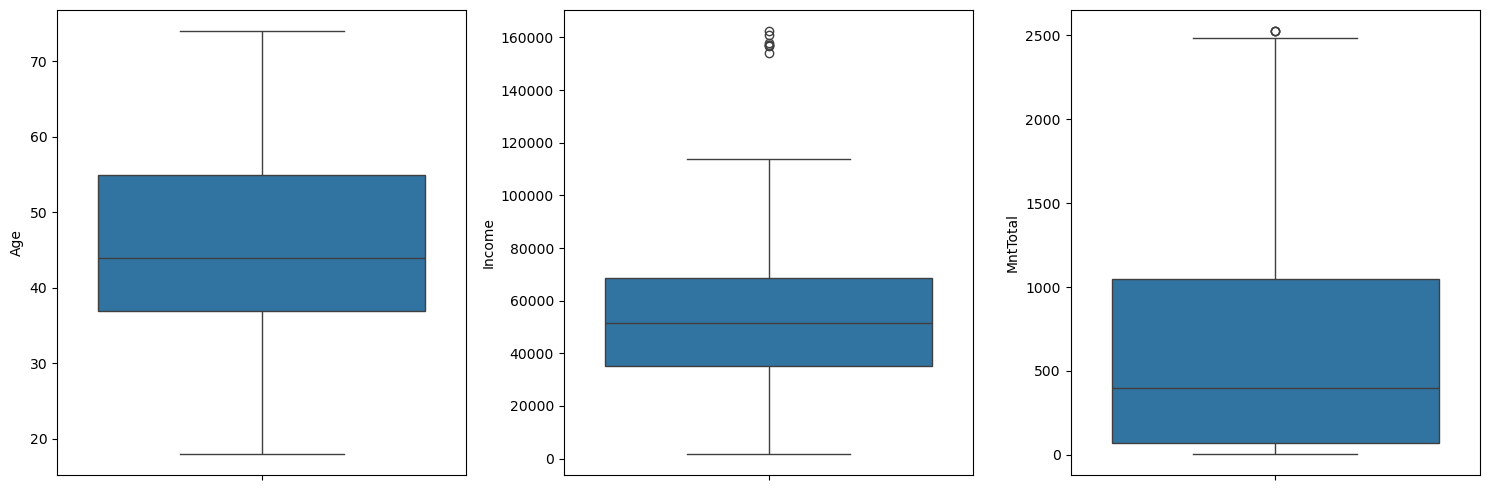

In [46]:
seach_outliers = ['Age', 'Income', 'MntTotal']

fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

for i, column in enumerate(seach_outliers):
    sns.boxplot(data=df, y=column, ax=axs[i])
    
plt.show()

#### Removendo Colunas que não são mais importantes pra base

In [47]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'DaysSinceEnrolled',
       'YearsSinceEnrolled', 'Age', 'AgeGroup', 'MntTotal',
       'MntRegularProducts', 'Children', 'HasChildren', 'AcceptedCmpTotal',
       'HasAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

Colunas que serão removidas:
- 'ID'
- 'Year_Birth': já temos a coluna 'Age'
- 'Dt_Customer': já temos outras colunas derivadas desta com dados melhores pro proejeto
- 'Z_CostContact', 'Z_Revenue': já foram removidas por apresentarem valor único

In [48]:
df = df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation        Partner  71613.0        0         0       26       426   
3  Graduation        Partner  26646.0        1         0       26        11   
4         PhD        Partner  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  YearsSinceEnrolled  Age  \
0         88              546              172  ...                   1   57   
1          1                6                2  ...                   0   60   
2         49              127              111  ...                   0   49   
3          4               20               10  ...                   0   30   
4         43              118               46  ...                   0   33   

   AgeGroup  MntTotal  MntRegularProducts  Children  HasChildren  \
0     46-60      1617                1529         0            0   
1     46-60        27                  21         2            1   
2     46-60       776                 734         0            0   
3     18-30        53                  48         1            1   
4     31-45       422                 407         1            1   

   AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
0                 0               0                 22  
1                 0               0                  4  
2                 0               0                 20  
3                 0               0                  6  
4                 0               0                 14  

[5 rows x 35 columns]

#### Salvando esse dataframe após o tratamento dos dados

In [49]:
df.to_csv('../dados/customers_data_cleaned.csv', index=False)

#### Análises Gráficas

In [50]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DaysSinceEnrolled', 'YearsSinceEnrolled',
       'Age', 'AgeGroup', 'MntTotal', 'MntRegularProducts', 'Children',
       'HasChildren', 'AcceptedCmpTotal', 'HasAcceptedCmp',
       'NumTotalPurchases'],
      dtype='object')

In [51]:
with pd.option_context("display.float_format", "{:,.2f}".format, "display.max_columns", None):
    display(df.describe())

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2,212.00 2,212.00  2,212.00 2,212.00  2,212.00   2,212.00   
mean   51,958.81     0.44      0.51    49.02    305.29      26.33   
std    21,527.28     0.54      0.54    28.94    337.32      39.74   
min     1,730.00     0.00      0.00     0.00      0.00       0.00   
25%    35,233.50     0.00      0.00    24.00     24.00       2.00   
50%    51,371.00     0.00      0.00    49.00    175.50       8.00   
75%    68,487.00     1.00      1.00    74.00    505.00      33.00   
max   162,397.00     2.00      2.00    99.00  1,493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count         2,212.00         2,212.00          2,212.00      2,212.00   
mean            167.03            37.65             27.05         43.93   
std             224.25            54.77             41.09         51.71   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         24.50   
75%             232.25            50.00             33.00         56.00   
max           1,725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count           2,212.00         2,212.00             2,212.00   
mean                2.32             4.09                 2.67   
std                 1.92             2.74                 2.93   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count           2,212.00           2,212.00      2,212.00      2,212.00   
mean                5.81               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count      2,212.00      2,212.00      2,212.00  2,212.00  2,212.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       DaysSinceEnrolled  YearsSinceEnrolled      Age  MntTotal  \
count           2,212.00            2,212.00 2,212.00  2,212.00   
mean              353.71                0.48    45.09    607.27   
std               202.49                0.50    11.70    602.51   
min                 0.00                0.00    18.00      5.00   
25%               180.00                0.00    37.00     69.00   
50%               356.00                0.00    44.00    397.00   
75%               529.00                1.00    55.00  1,048.00   
max               699.00                1.00    74.00  2,525.00   

       MntRegularProducts  Children  HasChildren  AcceptedCmpTotal  \
count            2,212.00  2,212.00     2,212.00          2,212.00   
mean               563.34      0.95         0.71         

In [52]:
df.describe(exclude='number')

Education Marital_Status AgeGroup
count         2212           2212     2212
unique           5              2        4
top     Graduation        Partner    31-45
freq          1115           1428      964

In [53]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'Age', 'MntTotal', 'HasChildren']

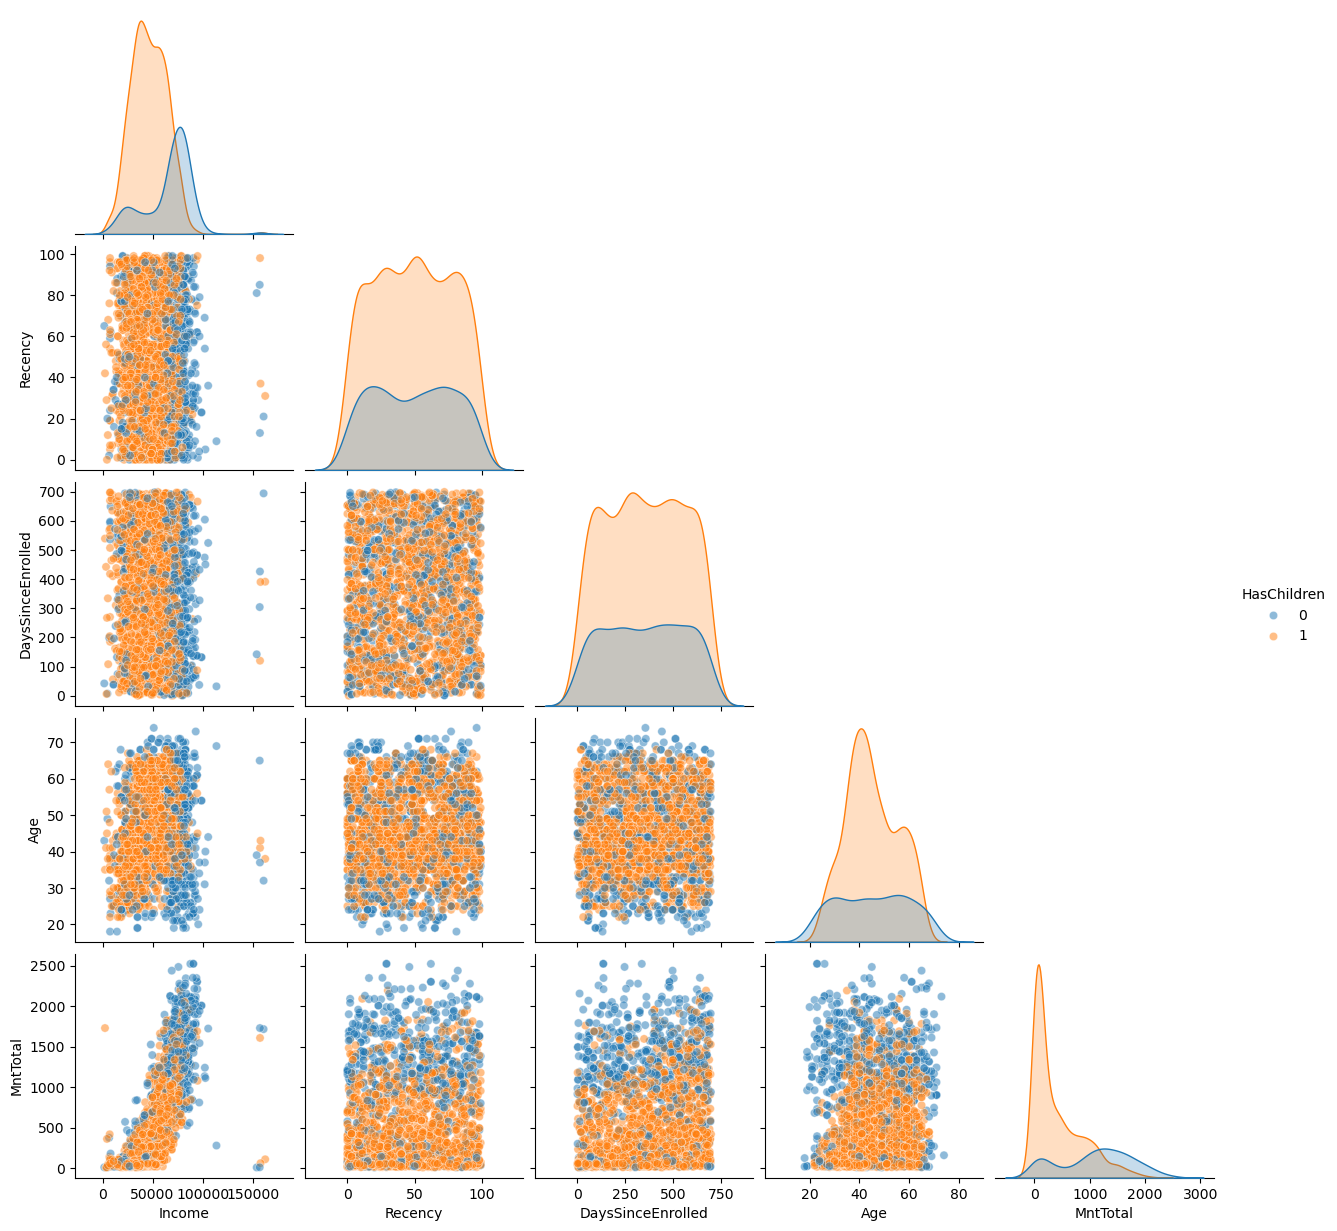

In [54]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'Age', 'MntTotal', 'HasChildren']

sns.pairplot(
    df[analise_colunas], 
    diag_kind='kde', 
    hue='HasChildren', 
    plot_kws=dict(alpha=0.5),
    corner=True
)

**Análise Gráfico Acima:** 
- Veja que famílias com filhos tendem a comprar menos produtos, e pessoas sem filhos chegam num valor de renda máxima maior
- Podemos perceber também uma correlação entre renda e consumo total de produtos

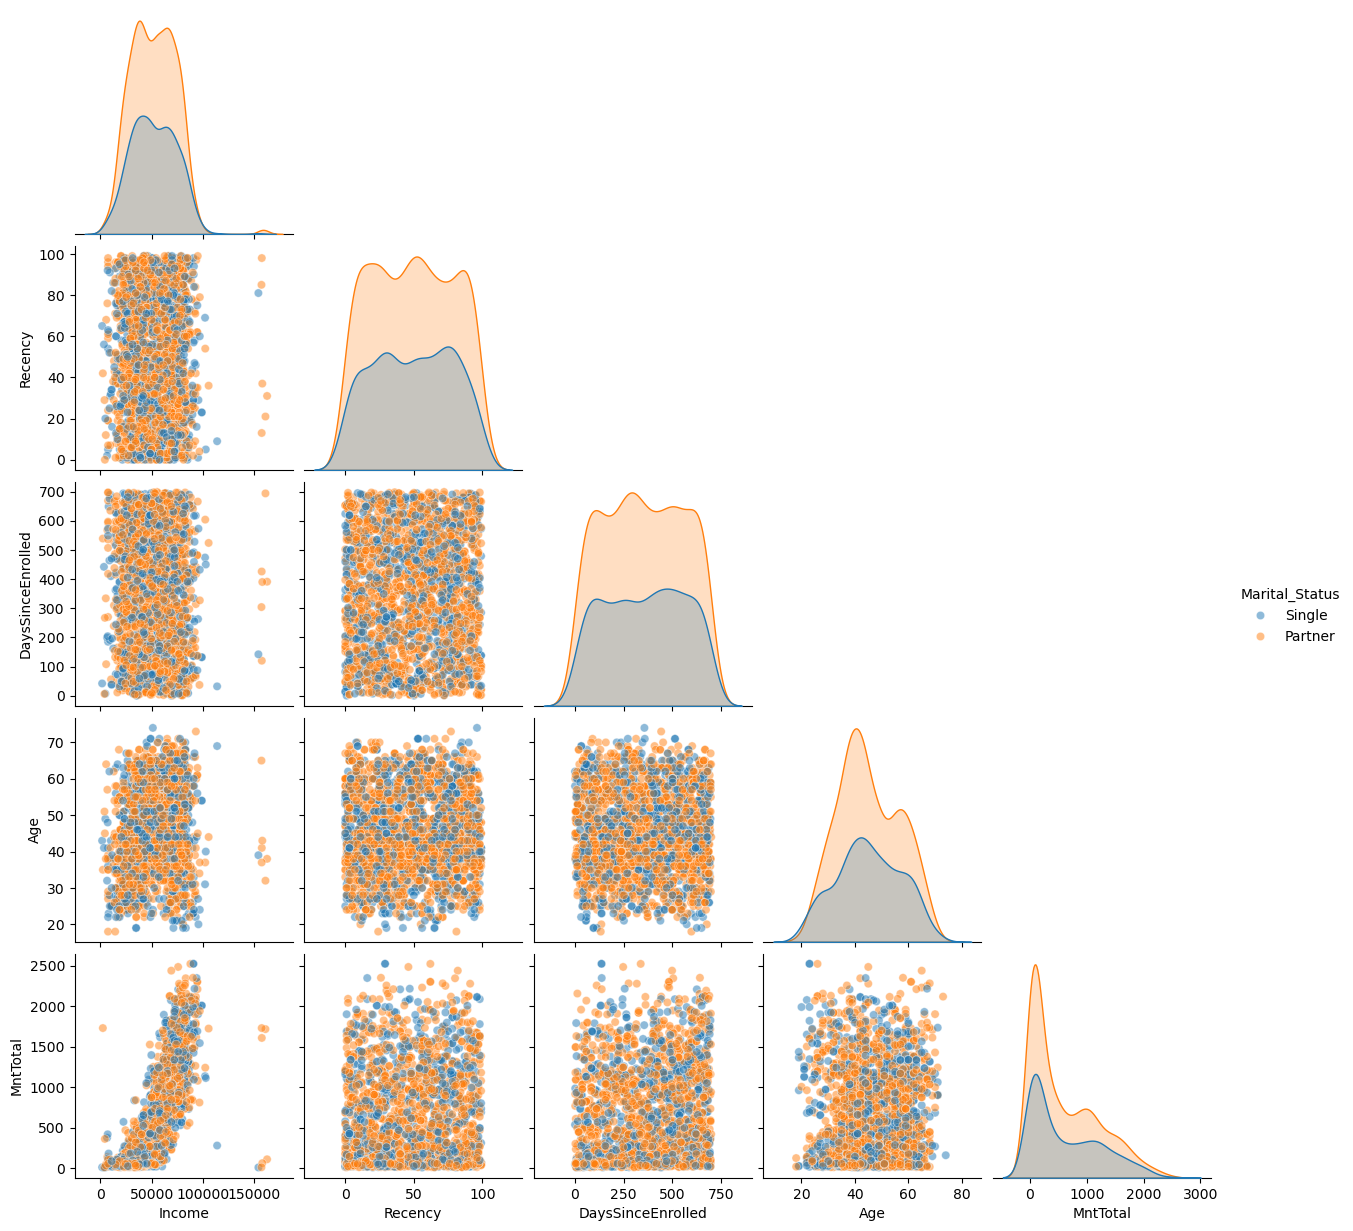

In [55]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'Age', 'MntTotal', 'Marital_Status']

sns.pairplot(
    df[analise_colunas], 
    diag_kind='kde', 
    hue='Marital_Status', 
    plot_kws=dict(alpha=0.5),
    corner=True
)

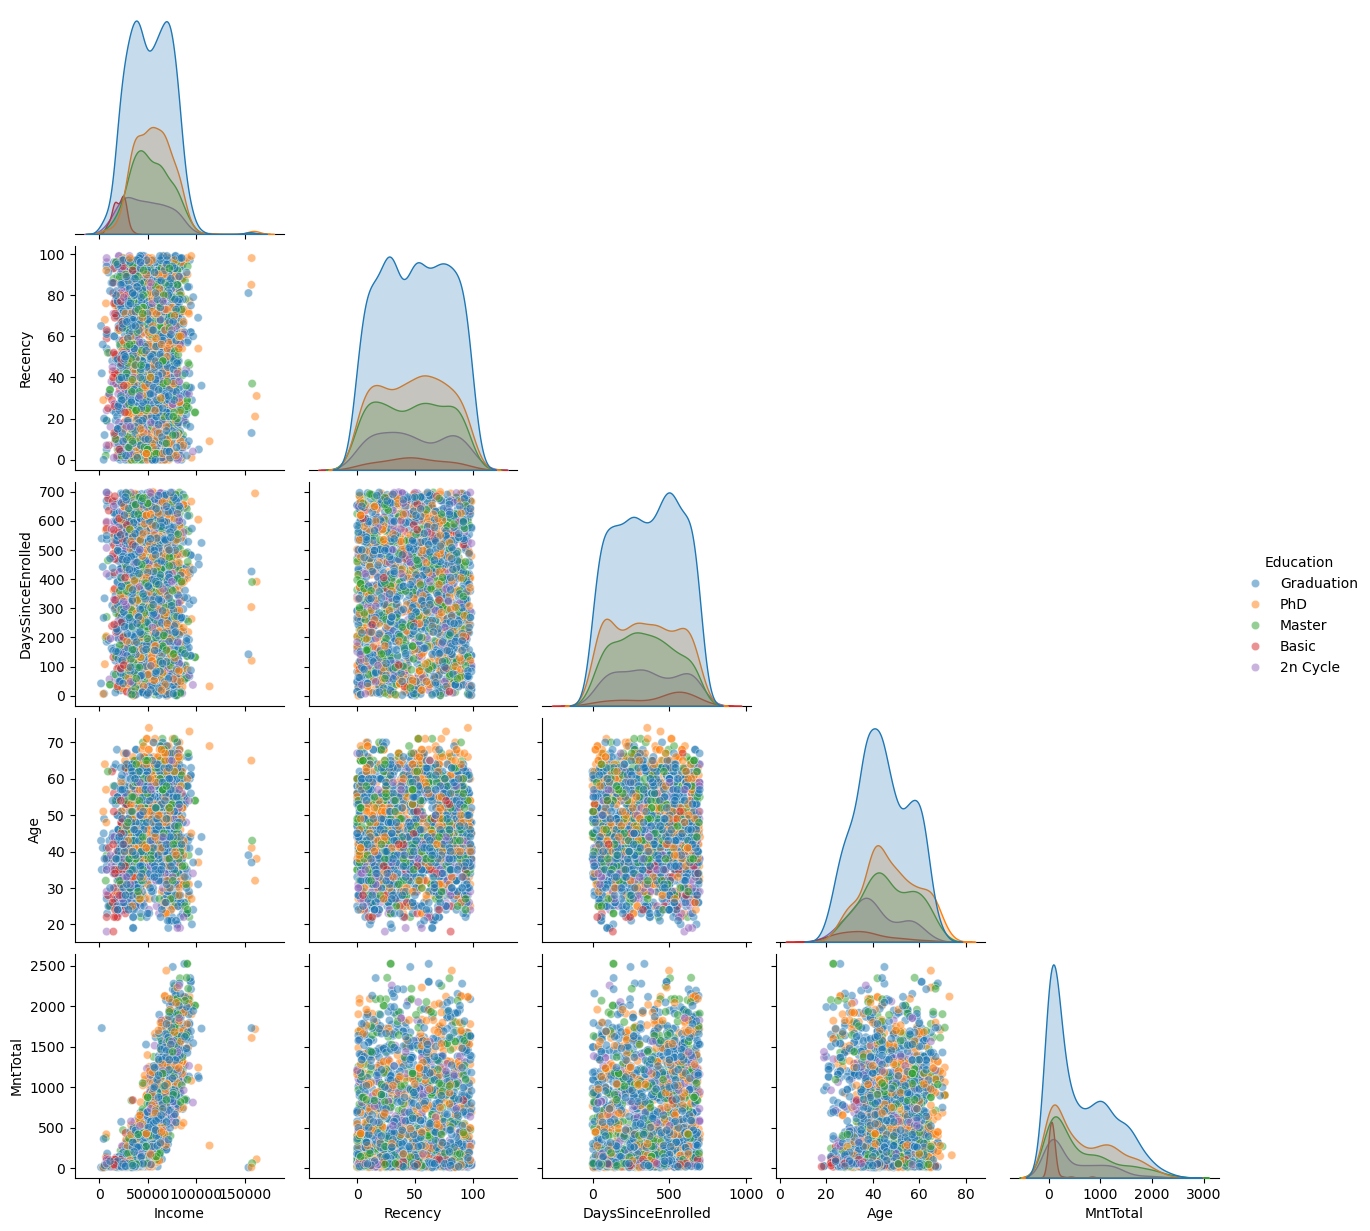

In [56]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'Age', 'MntTotal', 'Education']

sns.pairplot(
    df[analise_colunas], 
    diag_kind='kde', 
    hue='Education', 
    plot_kws=dict(alpha=0.5),
    corner=True
)

**Análise Gráfico Acima:** 
- Pessoas com menor grau de instrução tem renda média menor, e acabam comprando menos produtos também.
- Pessoas com maior grau de instrução são mais velhas se comparadas ao 'Basic'

In [ ]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'Age', 'MntTotal', 'HasAcceptedCmp']

sns.pairplot(
    df[analise_colunas], 
    diag_kind='kde', 
    hue='HasAcceptedCmp', 
    plot_kws=dict(alpha=0.5),
    corner=True
)

**Análise Gráfico Acima:** 
- Pessoas com que compraram após alguma campanha de marketing anterior geralmente tem uma renda salarial maior, e costumar consumir mais produtos também (MntTotal).

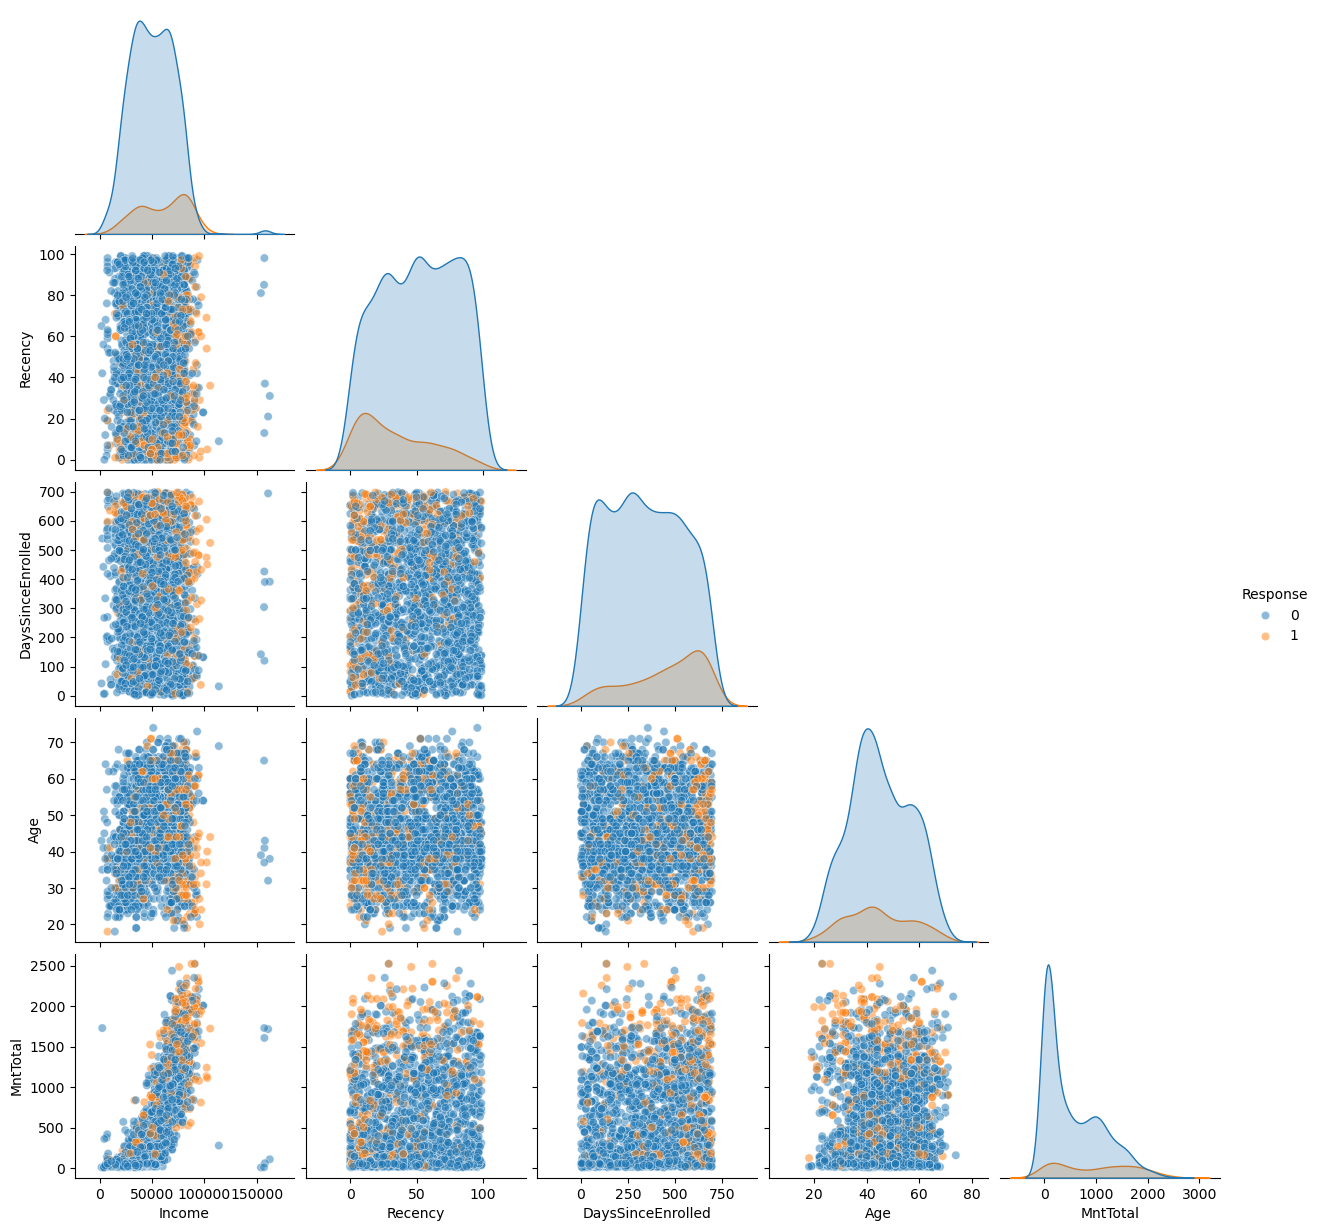

In [ ]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'Age', 'MntTotal', 'Response']

sns.pairplot(
    df[analise_colunas], 
    diag_kind='kde', 
    hue='Response', 
    plot_kws=dict(alpha=0.5),
    corner=True
)

**Análise Gráfico Acima:** 
- Pessoas com que responderam a campanha piloto geralmente tem uma renda salarial maior, e costumar consumir mais produtos também (MntTotal).
- Além disso, são pessoas fizeram a sua ultima compra em menos tempo (Recency).
- E são clientes cadastrados a mais tempo (DaysSinceEnrolled)

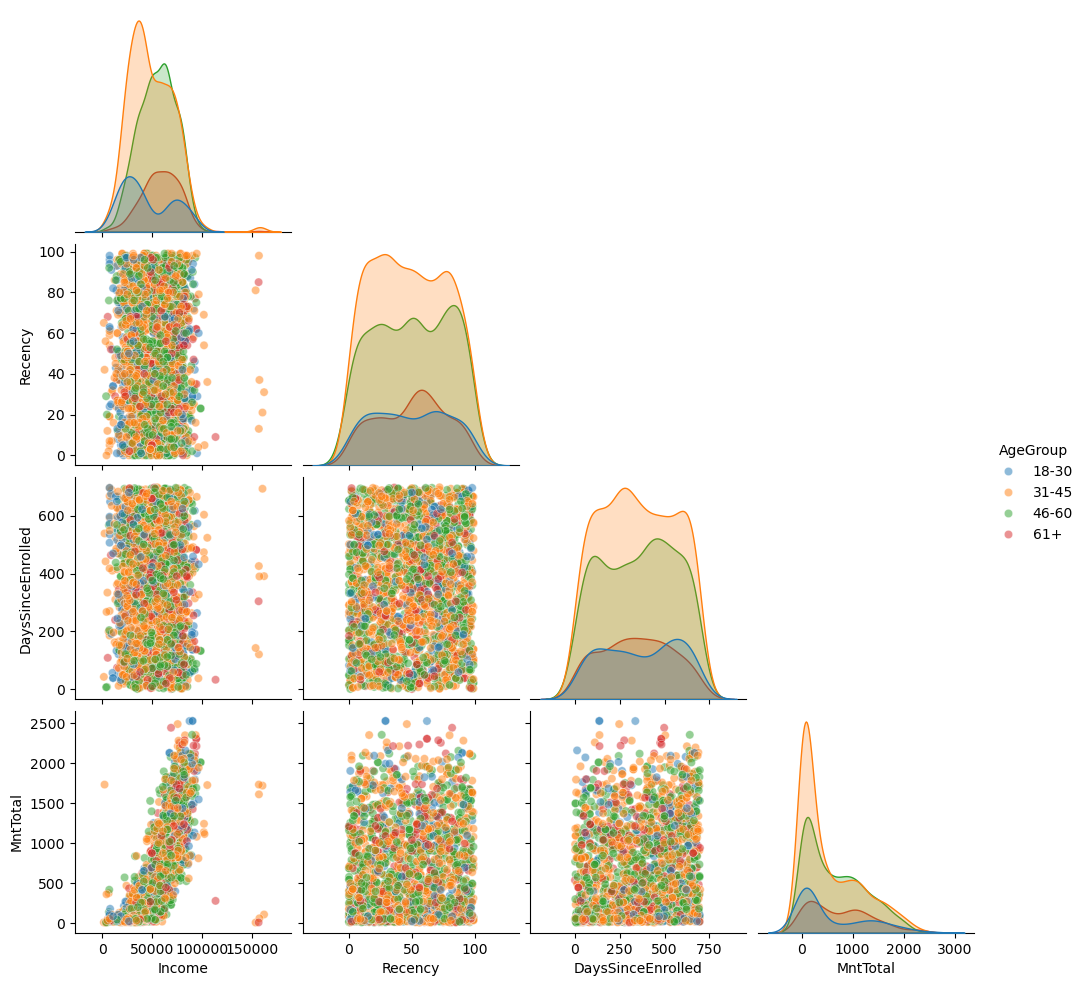

In [ ]:
analise_colunas = ['Income', 'Recency', 'DaysSinceEnrolled', 'MntTotal', 'AgeGroup']

sns.pairplot(
    df[analise_colunas], 
    diag_kind='kde', 
    hue='AgeGroup', 
    plot_kws=dict(alpha=0.5),
    corner=True
)

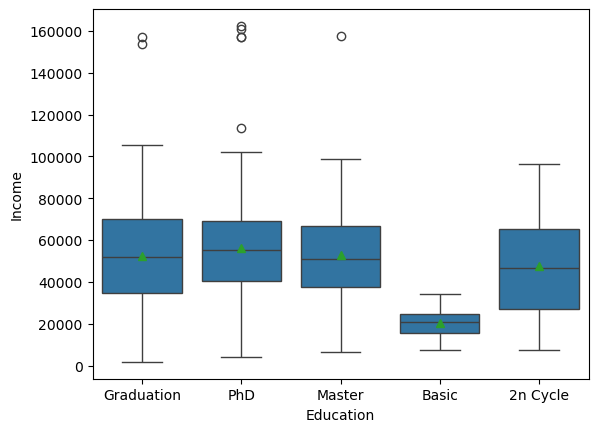

In [ ]:
sns.boxplot(x='Education', y='Income', data=df, showmeans=True);

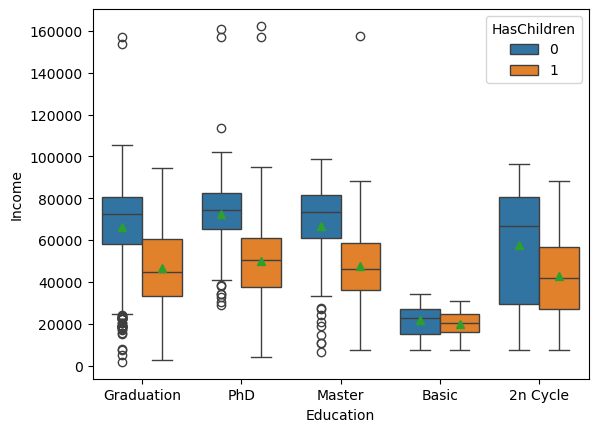

In [ ]:
sns.boxplot(x='Education', y='Income', data=df, showmeans=True, hue='HasChildren');

**Análise Gráfico Acima:** Sabemos que a informação da quantidade de filhos tem peso significativo nesse projeto, pois para todos os níveis educacionais há redução da média salarial.

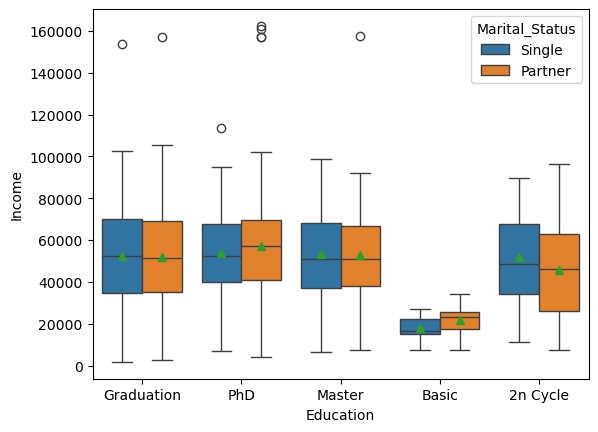

In [ ]:
sns.boxplot(x='Education', y='Income', data=df, showmeans=True, hue='Marital_Status');

**Análise Gráfico Acima:** Já o fato da pessoa ser solteira ou ter algum parceiro parece que isso não influencia tanto na renda.

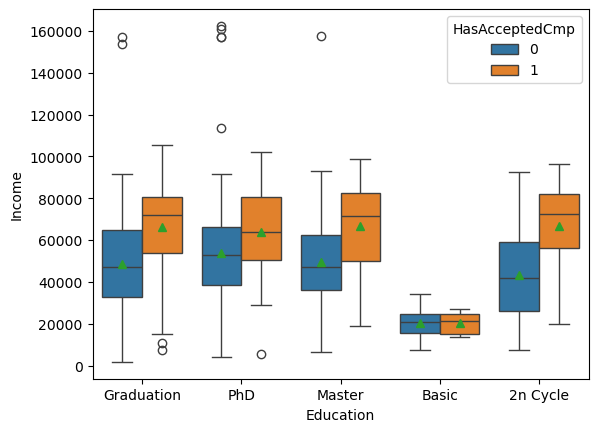

In [ ]:
sns.boxplot(x='Education', y='Income', data=df, showmeans=True, hue='HasAcceptedCmp');

**Análise Gráfico Acima:** Clientes que compraram após alguma campanha de marketing anterior possuem maior renda independente do nível educacional

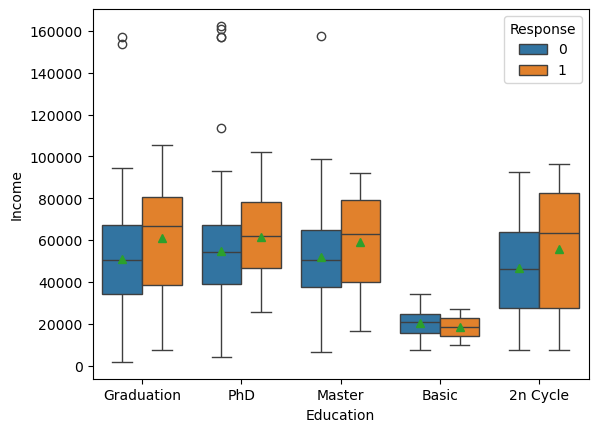

In [ ]:
sns.boxplot(x='Education', y='Income', data=df, showmeans=True, hue='Response');

**Análise Gráfico Acima:** Clientes que compraram após a campanha de marketing piloto possuem maior renda independente do nível educacional, mas essa diferença de renda não é tão significativa quanto no gráfico anterior.

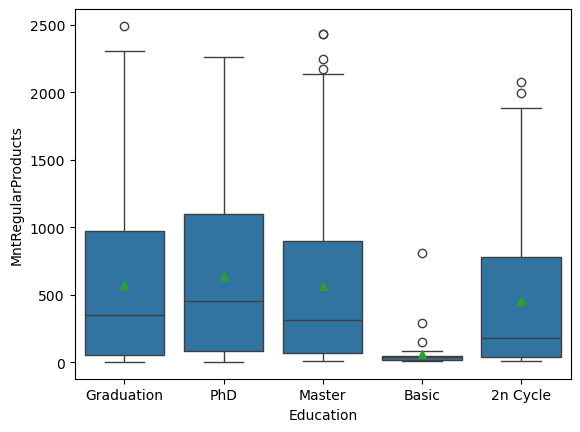

In [ ]:
sns.boxplot(x='Education', y='MntRegularProducts', data=df, showmeans=True);

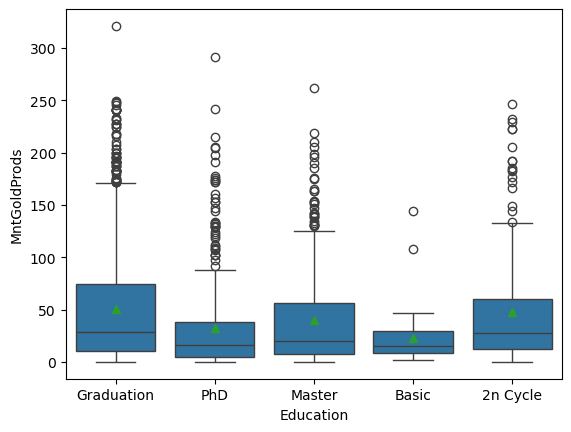

In [ ]:
sns.boxplot(x='Education', y='MntGoldProds', data=df, showmeans=True);

**Análise do Gráfico Acima:** Veja que esses "Gold Products" não tem relação de consumo com pessoas com maior grau educacional.

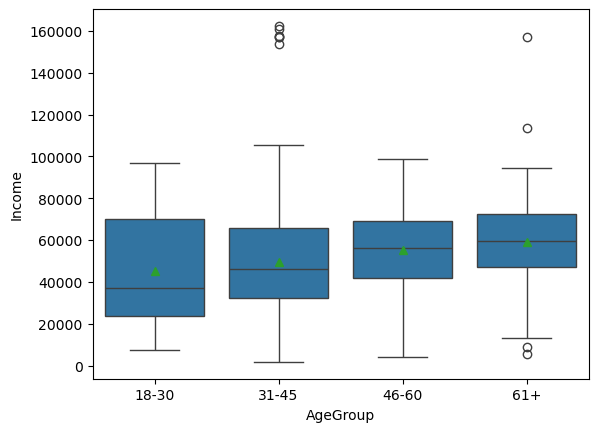

In [ ]:
sns.boxplot(x='AgeGroup', y='Income', data=df, showmeans=True);

**Análise do Gráfico Acima:** Renda tem a tendência de aumentar com a idade

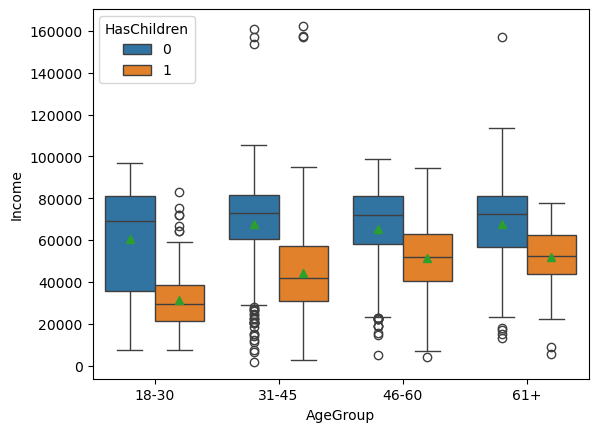

In [ ]:
sns.boxplot(x='AgeGroup', y='Income', data=df, showmeans=True, hue='HasChildren');

**Análise do Gráfico Acima:** Renda diminui para famílias com filhos, mas essa diferença renda familiar reduz a medida que a idade dos clientes aumenta

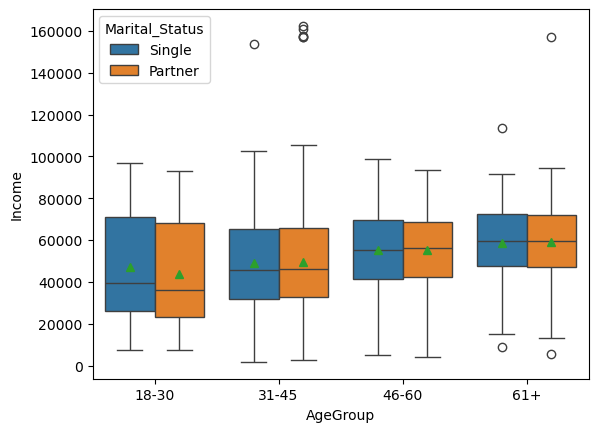

In [ ]:
sns.boxplot(x='AgeGroup', y='Income', data=df, showmeans=True, hue='Marital_Status');

**Análise do Gráfico Acima:** Não há diferença significativa de renda nos grupos de idade para o Marital_Status

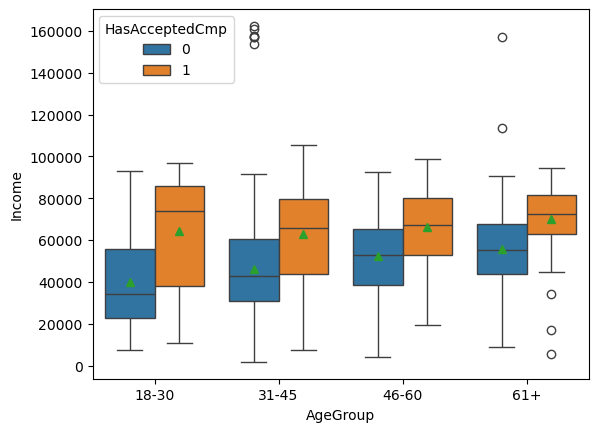

In [ ]:
sns.boxplot(x='AgeGroup', y='Income', data=df, showmeans=True, hue='HasAcceptedCmp');

**Análise do Gráfico Acima:** Quem aceitou alguma campanha de marketing possui renda maior em todos os grupos de idade, mas essa diferença de renda reduz a medida que a idade dos grupos aumenta também.

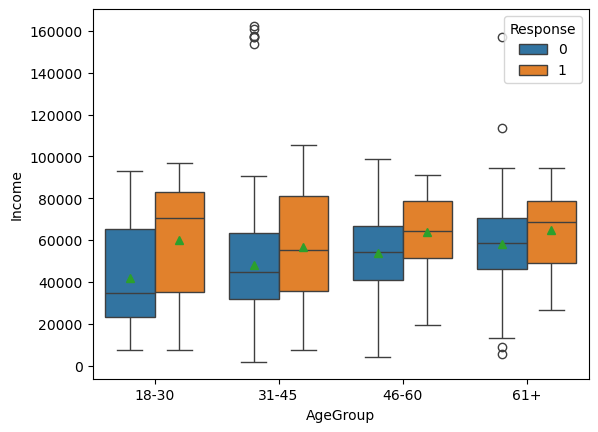

In [ ]:
sns.boxplot(x='AgeGroup', y='Income', data=df, showmeans=True, hue='Response');

**Análise do Gráfico Acima:** Quem aceitou a campanha de marketing piloto possui renda maior em todos os grupos de idade, mas essa diferença de renda reduz a medida que a idade dos grupos aumenta também.

### Correlações entre as variáveis

In [ ]:
df_dummies = pd.get_dummies(df, dtype='uint8')
df_dummies.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Partner  Marital_Status_Single  AgeGroup_18-30  \
0                       0                      1               0   
1                       0                      1               0   
2                       1                      0               0   
3                       1                      0               1   
4                       1                      0               0   

   AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
0               0               1             0  
1               0               1             0  
2               0               1             0  
3               0               0             0  
4               1               0             0  

[5 rows x 43 columns]

In [ ]:
df_dummies.to_csv('../dados/customers_new_features_and_drop_dummies.csv')

In [ ]:
df_dummies_corr = df_dummies.corr()
df_dummies_corr

Income   Kidhome  Teenhome   Recency  MntWines  \
Income                  1.000000 -0.514523  0.034565  0.007965  0.688209   
Kidhome                -0.514523  1.000000 -0.039066  0.010623 -0.497203   
Teenhome                0.034565 -0.039066  1.000000  0.014392  0.003945   
Recency                 0.007965  0.010623  0.014392  1.000000  0.015981   
MntWines                0.688209 -0.497203  0.003945  0.015981  1.000000   
MntFruits               0.507354 -0.373258 -0.175905 -0.005257  0.385844   
MntMeatProducts         0.692279 -0.439031 -0.261134  0.022914  0.568081   
MntFishProducts         0.520040 -0.388643 -0.205235  0.000788  0.396915   
MntSweetProducts        0.523599 -0.377843 -0.163107  0.025244  0.389583   
MntGoldProds            0.388299 -0.354922 -0.018579  0.018148  0.391461   
NumDealsPurchases      -0.108207  0.216594  0.386805  0.002591  0.009117   
NumWebPurchases         0.459265 -0.372327  0.162239 -0.005680  0.553663   
NumCatalogPurchases     0.696589 -0.504598 -0.112477  0.024197  0.634237   
NumStorePurchases       0.631424 -0.501863  0.049212 -0.000460  0.640219   
NumWebVisitsMonth      -0.650257  0.447258  0.130985 -0.018965 -0.321616   
AcceptedCmp3           -0.015152  0.016135 -0.042797 -0.032361  0.061360   
AcceptedCmp4            0.219633 -0.162111  0.038168  0.017520  0.373349   
AcceptedCmp5            0.395569 -0.204582 -0.190119  0.000233  0.472889   
AcceptedCmp1            0.327524 -0.174261 -0.145198 -0.021147  0.351610   
AcceptedCmp2            0.104036 -0.081911 -0.015633 -0.001429  0.206309   
Complain               -0.027900  0.037067  0.007746  0.005713 -0.036420   
Response                0.161387 -0.077901 -0.154402 -0.200114  0.246320   
DaysSinceEnrolled      -0.023760 -0.055281  0.018557  0.025681  0.167852   
YearsSinceEnrolled      0.000595 -0.045567  0.015304  0.026735  0.148575   
Age                     0.199977 -0.237497  0.361932  0.015694  0.164615   
MntTotal                0.792740 -0.557949 -0.137964  0.020479  0.892996   
MntRegularProducts      0.793086 -0.550877 -0.142415  0.019761  0.897504   
Children               -0.343529  0.688081  0.698199  0.018062 -0.353356   
HasChildren            -0.403132  0.520355  0.587993  0.002189 -0.341994   
AcceptedCmpTotal        0.365986 -0.211343 -0.129475 -0.013471  0.510349   
HasAcceptedCmp          0.314752 -0.202200 -0.099840 -0.016345  0.464102   
NumTotalPurchases       0.742691 -0.573144  0.038248  0.007462  0.757251   
Education_2n Cycle     -0.063132  0.019313 -0.055772 -0.006887 -0.095325   
Education_Basic        -0.232642  0.055382 -0.120148 -0.003143 -0.139800   
Education_Graduation    0.009881 -0.002485 -0.025014  0.030820 -0.059771   
Education_Master        0.019802  0.013127  0.023177 -0.026142  0.036504   
Education_PhD           0.101006 -0.042918  0.093078 -0.007896  0.157988   
Marital_Status_Partner -0.004803  0.026898  0.032320 -0.000417 -0.008473   
Marital_Status_Single   0.004803 -0.026898 -0.032320  0.000417  0.008473   
AgeGroup_18-30         -0.113254  0.064353 -0.337082  0.001122 -0.068404   
AgeGroup_31-45         -0.107563  0.212659 -0.125104 -0.033389 -0.105529   
AgeGroup_46-60          0.107649 -0.166914  0.311702  0.026703  0.090519   
AgeGroup_61+            0.120488 -0.147032  0.072905  0.011270  0.097867   

                        MntFruits  MntMeatProducts  MntFishProducts  \
Income                   0.507354         0.692279         0.520040   
Kidhome                 -0.373258        -0.439031        -0.388643   
Teenhome                -0.175905        -0.261134        -0.205235   
Recency                 -0.005257         0.022914         0.000788   
MntWines                 0.385844         0.568081         0.396915   
MntFruits                1.000000         0.546740         0.593038   
MntMeatProducts          0.546740         1.000000         0.572986   
MntFishProducts          0.593038         0.572986         1.000000   
MntSweetProducts         0.571474         

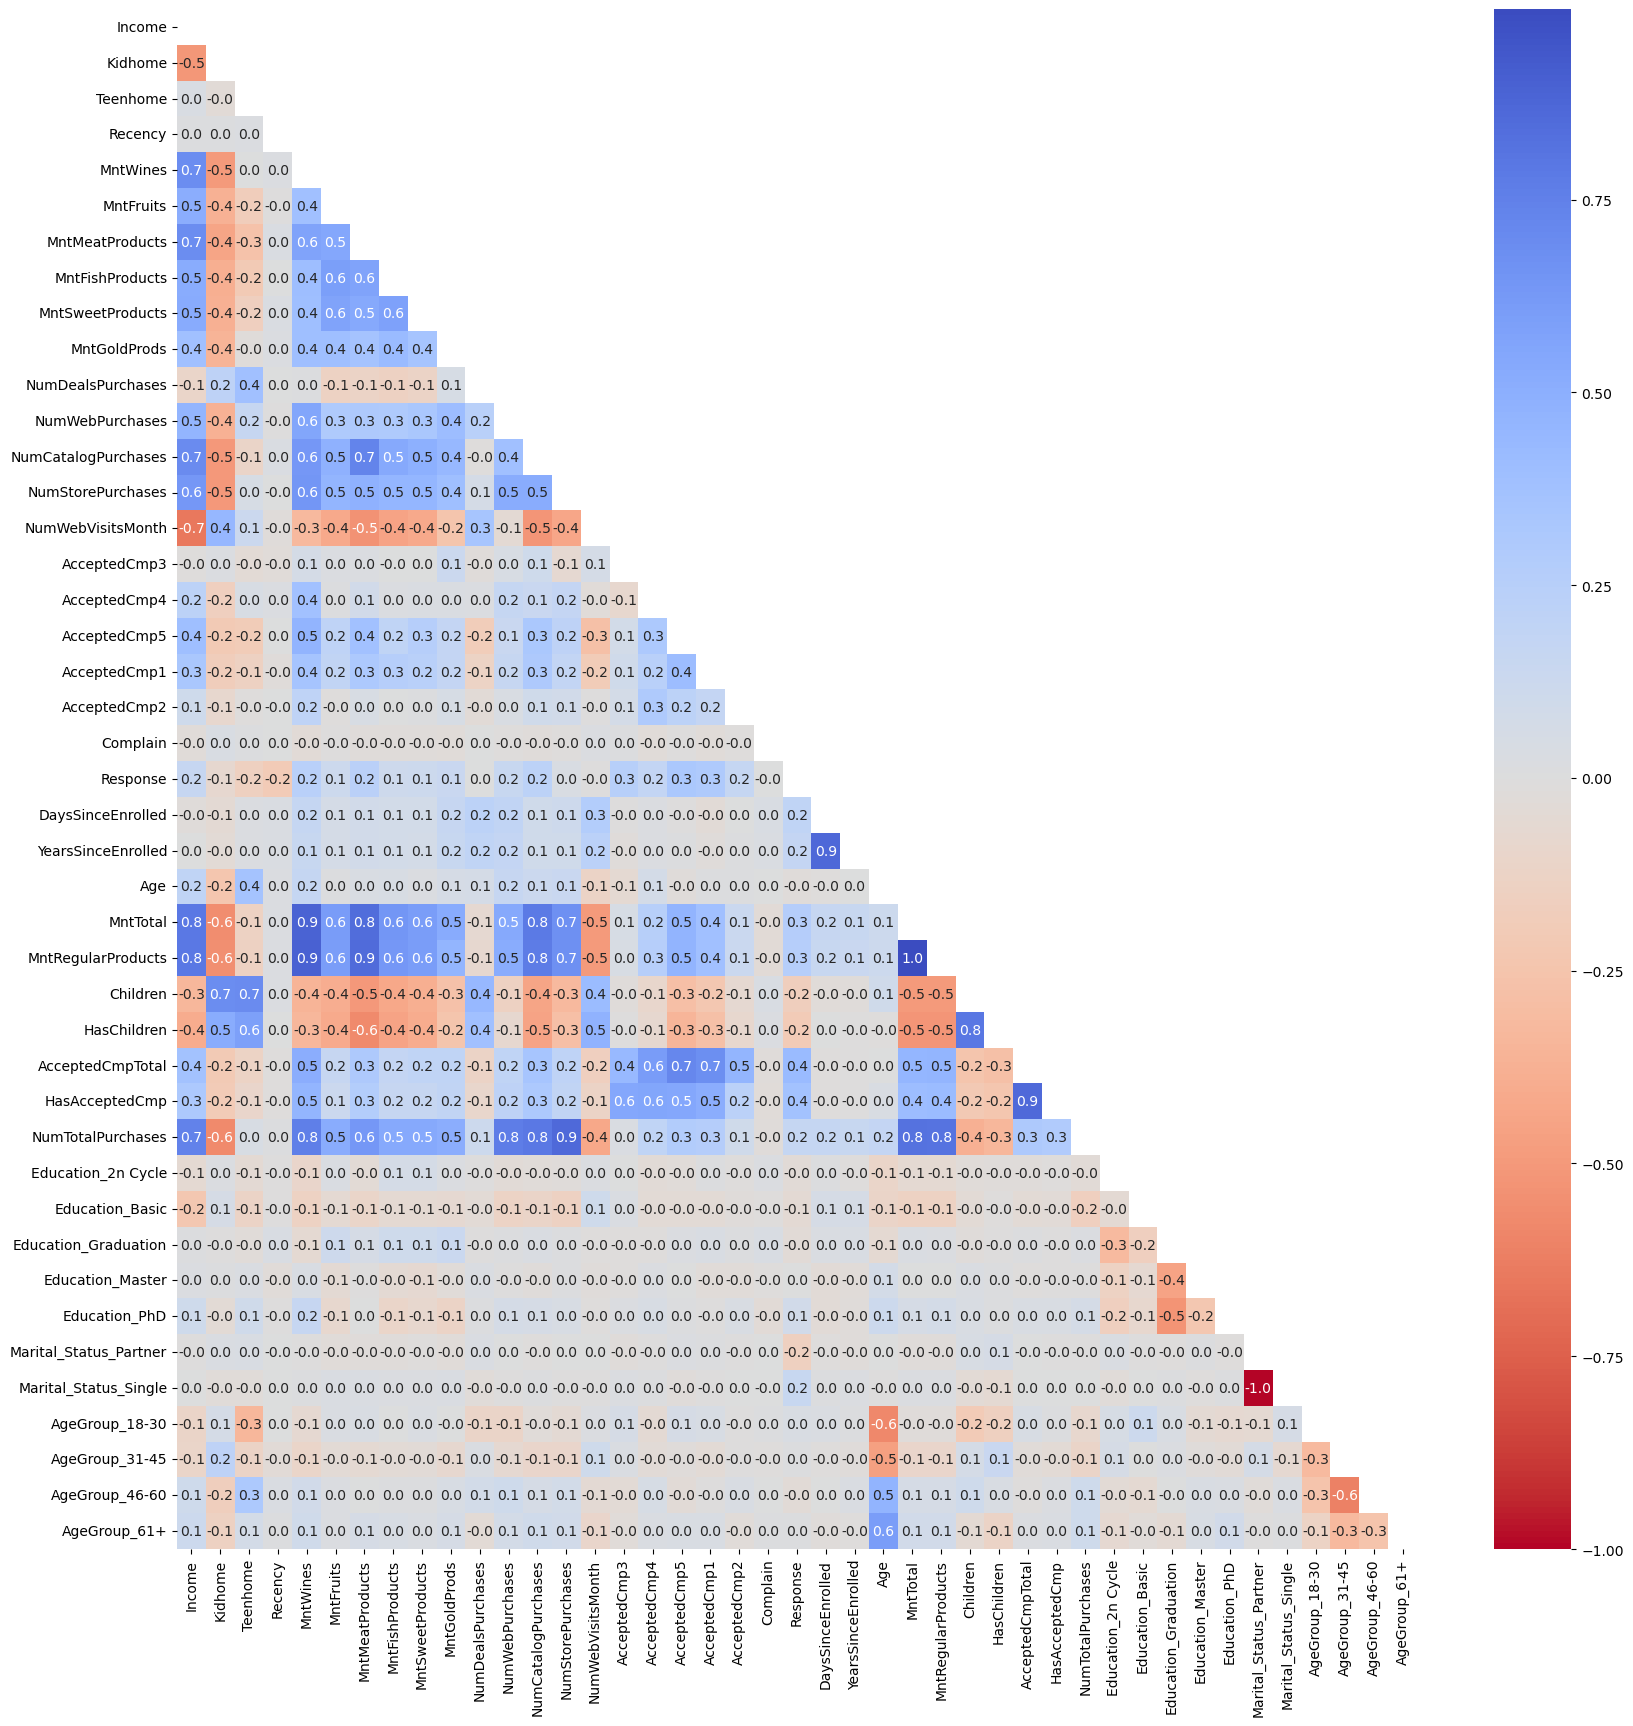

In [ ]:
matriz = np.triu(df_dummies_corr)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_dummies_corr, mask=matriz, annot=True, fmt=".1f", ax=ax, cmap='coolwarm_r')

plt.show()

In [ ]:
df_dummies_corr.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
Income    1.000000 -0.514523  0.034565  0.007965  0.688209   0.507354   
Kidhome  -0.514523  1.000000 -0.039066  0.010623 -0.497203  -0.373258   
Teenhome  0.034565 -0.039066  1.000000  0.014392  0.003945  -0.175905   
Recency   0.007965  0.010623  0.014392  1.000000  0.015981  -0.005257   
MntWines  0.688209 -0.497203  0.003945  0.015981  1.000000   0.385844   

          MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Income           0.692279         0.520040          0.523599      0.388299   
Kidhome         -0.439031        -0.388643         -0.377843     -0.354922   
Teenhome        -0.261134        -0.205235         -0.163107     -0.018579   
Recency          0.022914         0.000788          0.025244      0.018148   
MntWines         0.568081         0.396915          0.389583      0.391461   

          ...  Education_Basic  Education_Graduation  Education_Master  \
Income    ...        -0.232642              0.009881          0.019802   
Kidhome   ...         0.055382             -0.002485          0.013127   
Teenhome  ...        -0.120148             -0.025014          0.023177   
Recency   ...        -0.003143              0.030820         -0.026142   
MntWines  ...        -0.139800             -0.059771          0.036504   

          Education_PhD  Marital_Status_Partner  Marital_Status_Single  \
Income         0.101006               -0.004803               0.004803   
Kidhome       -0.042918                0.026898              -0.026898   
Teenhome       0.093078                0.032320              -0.032320   
Recency       -0.007896               -0.000417               0.000417   
MntWines       0.157988               -0.008473               0.008473   

          AgeGroup_18-30  AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
Income         -0.113254       -0.107563        0.107649      0.120488  
Kidhome         0.064353        0.212659       -0.166914     -0.147032  
Teenhome       -0.337082       -0.125104        0.311702      0.072905  
Recency         0.001122       -0.033389        0.026703      0.011270  
MntWines       -0.068404       -0.105529        0.090519      0.097867  

[5 rows x 43 columns]

In [ ]:
df_dummies_corr_unstack = pd.DataFrame(df_dummies_corr.unstack())

df_dummies_corr_unstack = df_dummies_corr_unstack.rename(columns={0: 'corr'})

df_dummies_corr_unstack.head(30)

# O "unstack" coloca uma coluna um nível acima uma das variáveis perante as outras (na tabela abaixo isso foi feito com Income)

corr
Income Income               1.000000
       Kidhome             -0.514523
       Teenhome             0.034565
       Recency              0.007965
       MntWines             0.688209
       MntFruits            0.507354
       MntMeatProducts      0.692279
       MntFishProducts      0.520040
       MntSweetProducts     0.523599
       MntGoldProds         0.388299
       NumDealsPurchases   -0.108207
       NumWebPurchases      0.459265
       NumCatalogPurchases  0.696589
       NumStorePurchases    0.631424
       NumWebVisitsMonth   -0.650257
       AcceptedCmp3        -0.015152
       AcceptedCmp4         0.219633
       AcceptedCmp5         0.395569
       AcceptedCmp1         0.327524
       AcceptedCmp2         0.104036
       Complain            -0.027900
       Response             0.161387
       DaysSinceEnrolled   -0.023760
       YearsSinceEnrolled   0.000595
       Age                  0.199977
       MntTotal             0.792740
       MntRegularProducts   0.793086
       Children            -0.343529
       HasChildren         -0.403132
       AcceptedCmpTotal     0.365986

In [ ]:
# Analisando a correlação das variáveis com a feature 'Income'

df_dummies_corr_unstack.loc['Income'].sort_values(by='corr')

corr
NumWebVisitsMonth      -0.650257
Kidhome                -0.514523
HasChildren            -0.403132
Children               -0.343529
Education_Basic        -0.232642
AgeGroup_18-30         -0.113254
NumDealsPurchases      -0.108207
AgeGroup_31-45         -0.107563
Education_2n Cycle     -0.063132
Complain               -0.027900
DaysSinceEnrolled      -0.023760
AcceptedCmp3           -0.015152
Marital_Status_Partner -0.004803
YearsSinceEnrolled      0.000595
Marital_Status_Single   0.004803
Recency                 0.007965
Education_Graduation    0.009881
Education_Master        0.019802
Teenhome                0.034565
Education_PhD           0.101006
AcceptedCmp2            0.104036
AgeGroup_46-60          0.107649
AgeGroup_61+            0.120488
Response                0.161387
Age                     0.199977
AcceptedCmp4            0.219633
HasAcceptedCmp          0.314752
AcceptedCmp1            0.327524
AcceptedCmpTotal        0.365986
MntGoldProds            0.388299
AcceptedCmp5            0.395569
NumWebPurchases         0.459265
MntFruits               0.507354
MntFishProducts         0.520040
MntSweetProducts        0.523599
NumStorePurchases       0.631424
MntWines                0.688209
MntMeatProducts         0.692279
NumCatalogPurchases     0.696589
NumTotalPurchases       0.742691
MntTotal                0.792740
MntRegularProducts      0.793086
Income                  1.000000

**Correlação Negativa:** Podemos perceber correlações negativas entre a renda, o quantidade de crianças em casa, a quantidade de vezes que o cliente entre no site, e clientes com educação básica.

**Correlação Positiva:** percebemos correlação possitiva entre renda e o consumo dos produtos, de compras, da participação nas campanhas de marketing, etc.

In [ ]:
# Analisando a correlação das variáveis com a feature 'MntTotal'

df_dummies_corr_unstack.loc['MntTotal'].sort_values(by='corr')

corr
Kidhome                -0.557949
HasChildren            -0.521603
Children               -0.499931
NumWebVisitsMonth      -0.498769
Education_Basic        -0.137991
Teenhome               -0.137964
AgeGroup_31-45         -0.097528
NumDealsPurchases      -0.065571
Education_2n Cycle     -0.056100
Complain               -0.034135
Marital_Status_Partner -0.020930
AgeGroup_18-30         -0.020778
Education_Master        0.001844
Recency                 0.020479
Marital_Status_Single   0.020930
Education_Graduation    0.024971
AcceptedCmp3            0.053037
AgeGroup_46-60          0.058089
Education_PhD           0.058567
AgeGroup_61+            0.085544
Age                     0.115901
AcceptedCmp2            0.136336
YearsSinceEnrolled      0.147032
DaysSinceEnrolled       0.158525
AcceptedCmp4            0.249118
Response                0.264443
AcceptedCmp1            0.381354
HasAcceptedCmp          0.411259
AcceptedCmpTotal        0.456456
AcceptedCmp5            0.468695
MntGoldProds            0.527101
NumWebPurchases         0.529095
MntSweetProducts        0.606652
MntFruits               0.612129
MntFishProducts         0.641884
NumStorePurchases       0.675981
NumCatalogPurchases     0.780250
Income                  0.792740
NumTotalPurchases       0.823361
MntMeatProducts         0.845543
MntWines                0.892996
MntRegularProducts      0.997095
MntTotal                1.000000

In [ ]:
# Analisando a correlação das variáveis com a feature 'Recency'

df_dummies_corr_unstack.loc['Recency'].sort_values(by='corr')

corr
Response               -0.200114
AgeGroup_31-45         -0.033389
AcceptedCmp3           -0.032361
Education_Master       -0.026142
AcceptedCmp1           -0.021147
NumWebVisitsMonth      -0.018965
HasAcceptedCmp         -0.016345
AcceptedCmpTotal       -0.013471
Education_PhD          -0.007896
Education_2n Cycle     -0.006887
NumWebPurchases        -0.005680
MntFruits              -0.005257
Education_Basic        -0.003143
AcceptedCmp2           -0.001429
NumStorePurchases      -0.000460
Marital_Status_Partner -0.000417
AcceptedCmp5            0.000233
Marital_Status_Single   0.000417
MntFishProducts         0.000788
AgeGroup_18-30          0.001122
HasChildren             0.002189
NumDealsPurchases       0.002591
Complain                0.005713
NumTotalPurchases       0.007462
Income                  0.007965
Kidhome                 0.010623
AgeGroup_61+            0.011270
Teenhome                0.014392
Age                     0.015694
MntWines                0.015981
AcceptedCmp4            0.017520
Children                0.018062
MntGoldProds            0.018148
MntRegularProducts      0.019761
MntTotal                0.020479
MntMeatProducts         0.022914
NumCatalogPurchases     0.024197
MntSweetProducts        0.025244
DaysSinceEnrolled       0.025681
AgeGroup_46-60          0.026703
YearsSinceEnrolled      0.026735
Education_Graduation    0.030820
Recency                 1.000000

In [ ]:
# Analisando a correlação das variáveis com a feature 'Age'

df_dummies_corr_unstack.loc['Age'].sort_values(by='corr')

corr
AgeGroup_18-30         -0.579340
AgeGroup_31-45         -0.465341
Kidhome                -0.237497
NumWebVisitsMonth      -0.120282
Education_Basic        -0.115599
Education_2n Cycle     -0.103970
Education_Graduation   -0.061697
AcceptedCmp3           -0.061097
Response               -0.020937
AcceptedCmp5           -0.019025
DaysSinceEnrolled      -0.014216
HasChildren            -0.011841
Marital_Status_Single  -0.003692
AcceptedCmpTotal        0.001878
YearsSinceEnrolled      0.002283
Marital_Status_Partner  0.003692
Complain                0.004602
AcceptedCmp2            0.007821
AcceptedCmp1            0.011941
MntFruits               0.013447
Recency                 0.015694
MntSweetProducts        0.021516
HasAcceptedCmp          0.030561
MntMeatProducts         0.033622
MntFishProducts         0.041154
MntGoldProds            0.059779
NumDealsPurchases       0.066156
AcceptedCmp4            0.070035
Education_Master        0.074694
Children                0.092676
MntRegularProducts      0.115682
MntTotal                0.115901
Education_PhD           0.122861
NumCatalogPurchases     0.125856
NumStorePurchases       0.138998
NumWebPurchases         0.162265
MntWines                0.164615
NumTotalPurchases       0.175602
Income                  0.199977
Teenhome                0.361932
AgeGroup_46-60          0.469431
AgeGroup_61+            0.604222
Age                     1.000000

In [ ]:
# Analisando a correlação das variáveis com a feature 'Response'

df_dummies_corr_unstack.loc['Response'].sort_values(by='corr')

corr
HasChildren            -0.203885
Recency                -0.200114
Children               -0.167937
Teenhome               -0.154402
Marital_Status_Partner -0.150577
Kidhome                -0.077901
Education_Basic        -0.050210
Education_Graduation   -0.040089
AgeGroup_46-60         -0.038875
Education_2n Cycle     -0.034574
Age                    -0.020937
NumWebVisitsMonth      -0.002625
Complain               -0.000145
NumDealsPurchases       0.003226
Education_Master        0.003583
AgeGroup_61+            0.008800
AgeGroup_31-45          0.009884
AgeGroup_18-30          0.032786
NumStorePurchases       0.035563
Education_PhD           0.088143
MntFishProducts         0.108135
MntSweetProducts        0.116059
MntFruits               0.123007
MntGoldProds            0.141096
Marital_Status_Single   0.150577
NumWebPurchases         0.151084
Income                  0.161387
NumTotalPurchases       0.162893
AcceptedCmp2            0.169234
YearsSinceEnrolled      0.173962
AcceptedCmp4            0.180032
DaysSinceEnrolled       0.196228
NumCatalogPurchases     0.219912
MntMeatProducts         0.237966
MntWines                0.246320
AcceptedCmp3            0.253849
MntRegularProducts      0.263522
MntTotal                0.264443
AcceptedCmp1            0.297212
AcceptedCmp5            0.324891
HasAcceptedCmp          0.368319
AcceptedCmpTotal        0.427297
Response                1.000000

C:\Users\brcprrcchave\AppData\Local\Temp\ipykernel_1828\2880266344.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr['corr'], palette=listed_colors, ax=ax)


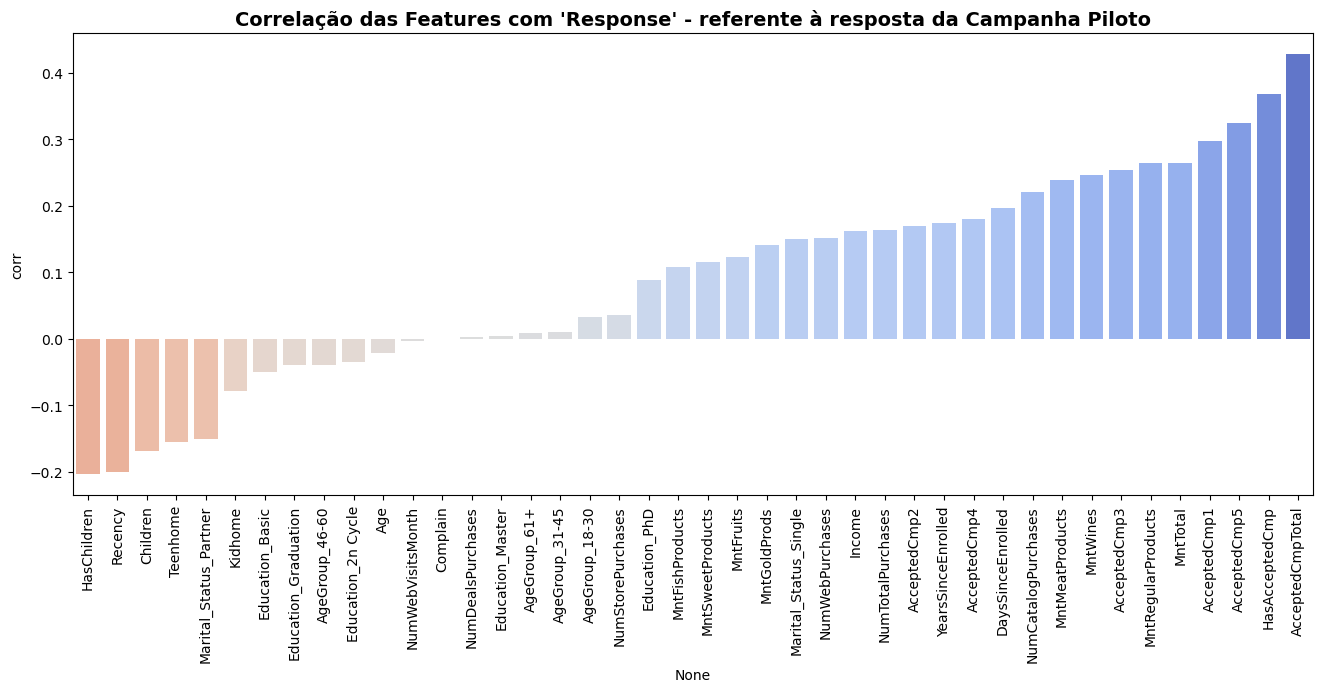

In [ ]:
# Ajustando a escala de cores pra inverter do azul pro vermelho no ponto 0

from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

# ajustando o mapa de cores para que a inversão de cores ocorre a partir do valor 0 de correlação
cmap='coolwarm_r'
cnorm= CenteredNorm(vcenter=0, halfrange=0.5)
smap=ScalarMappable(norm=cnorm, cmap=cmap)
listed_colors = ListedColormap([smap.to_rgba(x) for x in response_corr['corr']]).colors

fig, ax = plt.subplots(figsize=(16,6))

b = sns.barplot(x=response_corr.index, y=response_corr['corr'], palette=listed_colors, ax=ax)

b.tick_params(axis='x', rotation=90)
b.set_title("Correlação das Features com 'Response' - referente à resposta da Campanha Piloto", fontweight='bold', fontsize=14)

plt.show()

**Análise de Correlações:**
- Veja que quem tem crianças em casa tem correlação negativa com a resposta pra campanha piloto. O mesmo vale para quem tem parceiros em casa
- As features que encontramos features positivas estão relacionadas à pessoas que compraram após campanhas de marketing anteriores, e também aquelas pessoas que costumam comprar mais os produtos listados nesse df.